In [16]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv('datos2.csv')

In [18]:
df

,age,lwt,race,smoke,ptd,ht,ui,ftv,bwt
0,19,182,2,0,0,0,1,0,2523
1,33,155,3,0,0,0,0,3,2551
2,20,105,1,1,0,0,0,1,2557
3,21,108,1,1,0,0,1,2,2594
4,18,107,1,1,0,0,1,0,2600
...,...,...,...,...,...,...,...,...,...
184,28,95,1,1,0,0,0,2,2466
185,14,100,3,0,0,0,0,2,2495
186,23,94,3,1,0,0,0,0,2495
187,17,142,2,0,0,1,0,0,2495


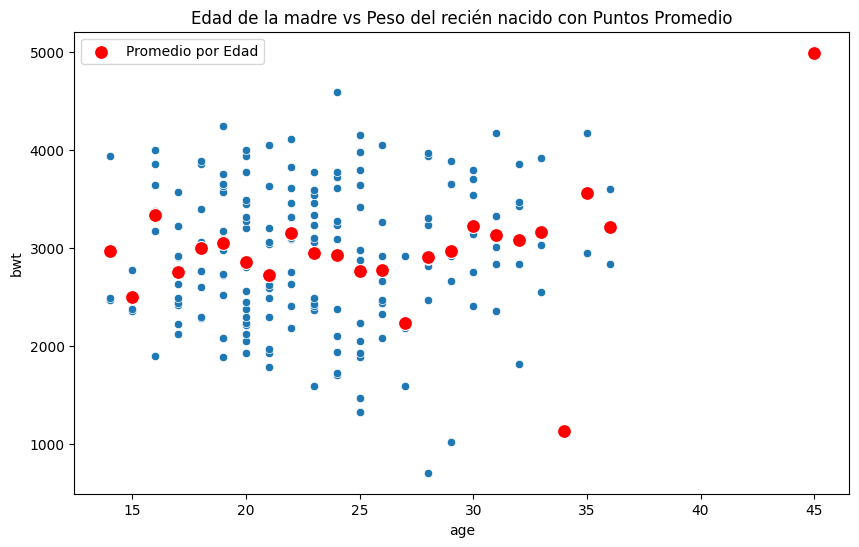

In [19]:
# Calcular el promedio del peso del recién nacido para cada edad
avg_bwt_by_age = df.groupby('age')['bwt'].mean().reset_index()
# Gráfica de dispersión de 'age' vs 'bwt' con puntos promedio marcados en rojo
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='bwt', data=df)
sns.scatterplot(x='age', y='bwt', data=avg_bwt_by_age, color='red', marker='o', s=100, label='Promedio por Edad')
plt.title('Edad de la madre vs Peso del recién nacido con Puntos Promedio')
plt.legend()
plt.show()

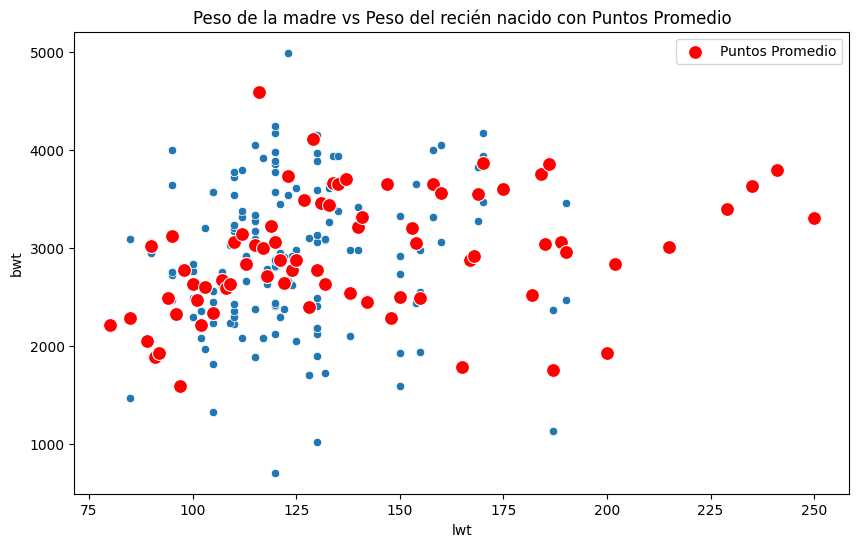

In [20]:
# Calcular el promedio del peso del recién nacido para cada edad
avg_bwt_by_age = df.groupby('lwt')['bwt'].mean().reset_index()
# Gráfica de dispersión de 'age' vs 'bwt' con puntos promedio marcados en rojo
plt.figure(figsize=(10, 6))
sns.scatterplot(x='lwt', y='bwt', data=df)
sns.scatterplot(x='lwt', y='bwt', data=avg_bwt_by_age, color='red', marker='o', s=100, label='Puntos Promedio')
plt.title('Peso de la madre vs Peso del recién nacido con Puntos Promedio')
plt.legend()
plt.show()

Media de peso del recién nacido para no fumadoras: 3055.695652173913
Media de peso del recién nacido para fumadoras: 2771.9189189189187


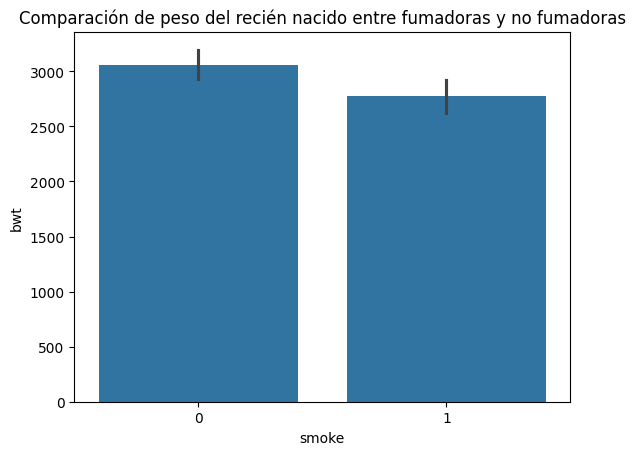

In [21]:
# Calcular la media del peso del recién nacido para 'smoke' = 0 y 'smoke' = 1
mean_bwt_smoke_0 = df[df['smoke'] == 0]['bwt'].mean()
mean_bwt_smoke_1 = df[df['smoke'] == 1]['bwt'].mean()
print(f'Media de peso del recién nacido para no fumadoras: {mean_bwt_smoke_0}')
print(f'Media de peso del recién nacido para fumadoras: {mean_bwt_smoke_1}')
# Gráfica de barras para comparar la media del peso del recién nacido entre fumadoras y no fumadoras
sns.barplot(x='smoke', y='bwt', data=df)
plt.title('Comparación de peso del recién nacido entre fumadoras y no fumadoras')
plt.show()

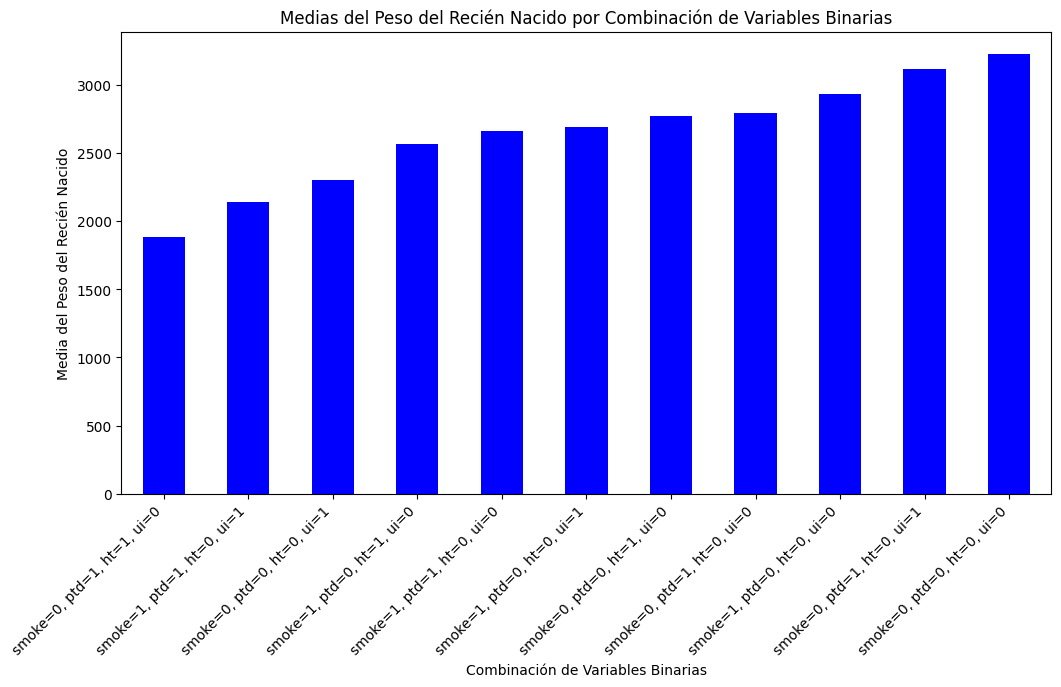

In [23]:
# Crear una nueva columna que represente la combinación de valores de las variables binarias
df['bin_combination'] = 'smoke=' + df['smoke'].astype(str) + ', ptd=' + df['ptd'].astype(str) + ', ht=' + df['ht'].astype(str) + ', ui=' + df['ui'].astype(str)

# Calcular las medias del peso del recién nacido para cada combinación de valores binarios
mean_bwt_by_bin_combination = df.groupby('bin_combination')['bwt'].mean()

# Crear un histograma
plt.figure(figsize=(12, 6))
mean_bwt_by_bin_combination.sort_values().plot(kind='bar', color='blue')
plt.title('Medias del Peso del Recién Nacido por Combinación de Variables Binarias')
plt.xlabel('Combinación de Variables Binarias')
plt.ylabel('Media del Peso del Recién Nacido')
plt.xticks(rotation=45, ha='right')
plt.show()

In [26]:
# Crear variables binarias para la raza
df['race_white'] = (df['race'] == 1).astype(int)
df['race_black'] = (df['race'] == 2).astype(int)

# Seleccionar las variables predictoras (X) y la variable dependiente (y)
X = df[['age', 'lwt', 'race_white', 'race_black', 'smoke', 'ptd', 'ht', 'ui', 'ftv']]
y = df['bwt']

# Agregar una constante al conjunto de variables predictoras (intercepto)
X = sm.add_constant(X)

# Ajustar el modelo de regresión lineal con variables categóricas
model = sm.OLS(y, X).fit()

# Obtener los residuos del modelo
residuals = model.resid


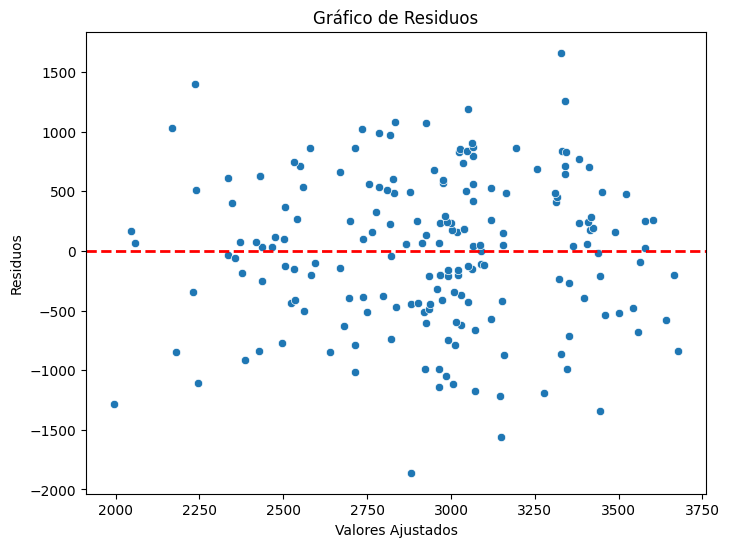

In [27]:
# Crear un gráfico de dispersión de los residuos
plt.figure(figsize=(8, 6))
sns.scatterplot(x=model.fittedvalues, y=residuals)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)  # Línea horizontal en y=0
plt.title('Gráfico de Residuos')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos')
plt.show()

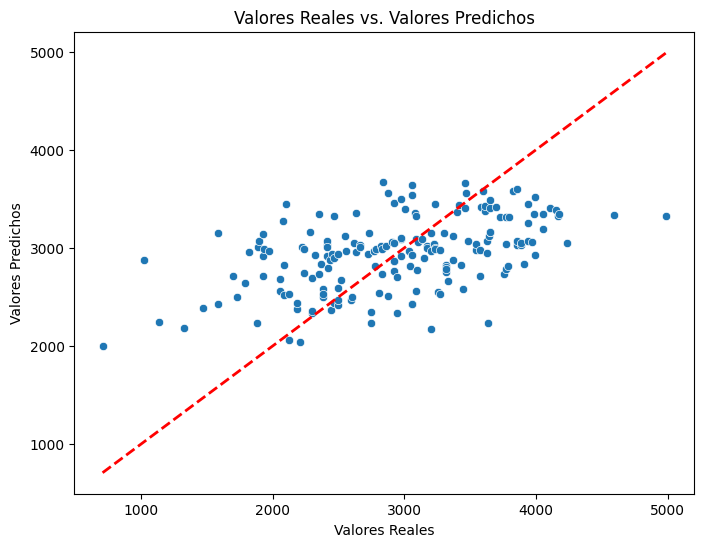

In [29]:
# Obtener los valores ajustados por el modelo
predicted_values = model.fittedvalues
# Crear un gráfico de dispersión de valores reales vs. valores predichos
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y, y=predicted_values)
plt.plot([y.min(), y.max()], [y.min(), y.max()], linestyle='--', color='red', linewidth=2)  # Línea de referencia y=x
plt.title('Valores Reales vs. Valores Predichos')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.show()